In [141]:
import gzip
from collections import defaultdict
from sklearn import linear_model
import string
import re
import datetime, time
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as md

In [2]:
#####
# SETUP
#####

In [2]:
def readCSV(path):
    f = open(path, 'rt')
    f.readline()

    for l in f:
        
        if l.startswith("timestamp"): 
            continue

        try: 
            timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education = re.split(r',(?![ ])', l)

        except:
            continue

        yield timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education


In [3]:
salaryRaw = []
for l in readCSV("Levels_Fyi_Salary_Data.csv"):
    salaryRaw.append(l)

In [4]:
print(len(salaryRaw))
print(salaryRaw[64])

62300
('9/11/2017 13:51:51', 'Apple', 'ICT3', 'Software Engineer', '210000', '"Cupertino, CA"', '3', '2', 'NA', '130000', '50000', '30000', 'NA', 'NA', '7158', '807', '98', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', 'NA', 'NA\n')


In [34]:
# id , unixtime, company, level, title, total_comp, city, state, experience, tenure, tag, 
# salary, stock, bonus, city_id, dma_id, ms_deg, bs_deg, phd_deg, hs, college

salaryAllData = []

for entry in salaryRaw:

    date, clocktime = entry[0].split(' ')
    date = date.split('/')
    clocktime = clocktime.split(':')
    timestamp = datetime.datetime(int(date[2]), int(date[0]), int(date[1]), int(clocktime[0]), int(clocktime[1]), int(clocktime[2]))
    timestamp = int(time.mktime(timestamp.timetuple()))


    company = entry[1]
    level = entry[2]
    title = entry[3]
   
    total_comp = int(float(entry[4]))

    location = entry[5]
    if location.count(',') == 2:
        city, state, country = location.strip('"').split(', ')
    elif location.count(',') == 1:
        city, state = location.strip('"').split(', ')
        country = 'USA'

    experience = entry[6]
    tenure = entry[7]

    tag = entry[8]

    salary = int(float(entry[9]))
    if salary == 0:
        continue

    stock = int(float(entry[10]))
    bonus = int(float(entry[11]))

    g = entry[12]
    gender = -1
    if g == 'Female':
        gender = 0
    elif g == 'Male':
        gender = 1
    elif g == 'Other':
        gender = 2

    city_id = int(entry[14])
    
    try: 
        dma_id = int(entry[15])
    except:
        dma_id = -1
    
    id = int(entry[16])

    ms_deg = int(entry[17])
    bs_deg = int(entry[18])
    phd_deg = int(entry[18])
    hs = int(entry[19])
    college = int(entry[20])

    r = entry[27]
    race = -1
    if r == 'Asian':
        race = 0
    elif r == 'Black':
        race = 1
    elif r == 'Hispanic':
        race = 2
    elif r == 'Two Or More':
        race = 3
    elif r == 'White':
        race = 4
    

    salaryAllData.append({
        'id': id,
        'timestamp': timestamp,
        'company': company,
        'level': level,
        'title': title,
        'total_comp': total_comp,
        'city': city,
        'state': state,
        'country': country,
        'experience': experience,
        'tenure': tenure,
        'tag': tag,
        'salary': salary,
        'stock': stock,
        'bonus': bonus,
        'gender': gender,
        'city_id': city_id,
        'dma_id': dma_id,
        'ms_deg': ms_deg,
        'bs_deg': bs_deg,
        'phd_deg': phd_deg,
        'hs': hs,
        'college': college,
        'race': race,
    })


In [32]:
print(len(salaryAllData))
print(salaryAllData[13423])

59996
{'id': 21317, 'timestamp': 1580317204, 'company': 'Capital One', 'level': 'Principal Associate', 'title': 'Software Engineer', 'total_comp': 136000, 'city': 'Washington', 'state': 'DC', 'country': 'USA', 'experience': '13', 'tenure': '2', 'tag': 'Full Stack', 'salary': 130000, 'stock': 0, 'bonus': 6000, 'gender': 1, 'city_id': 40303, 'dma_id': 511, 'ms_deg': 0, 'bs_deg': 0, 'phd_deg': 0, 'hs': 0, 'college': 0, 'race': -1}
7975


In [8]:
####
# PART 1
###

In [6]:
# Number of total datapoints
print(len(salaryAllData))

59996


In [10]:
# Company Values

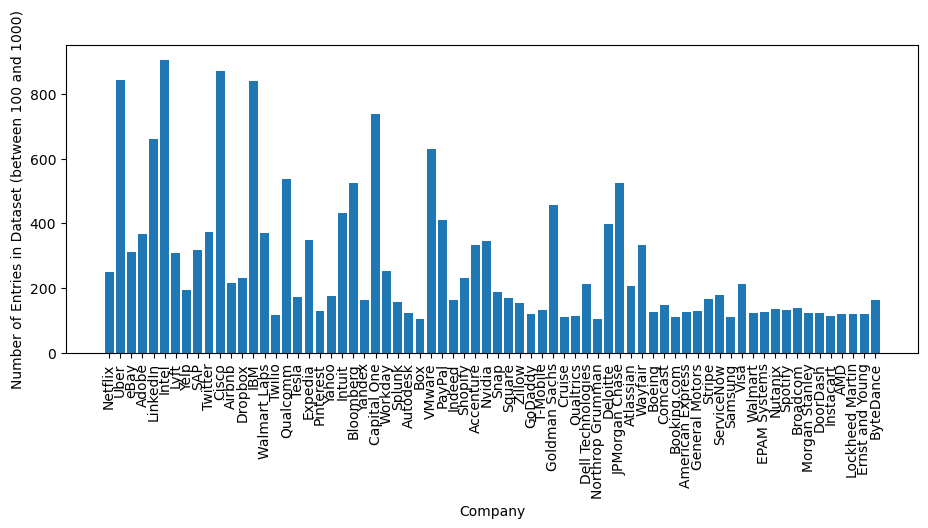

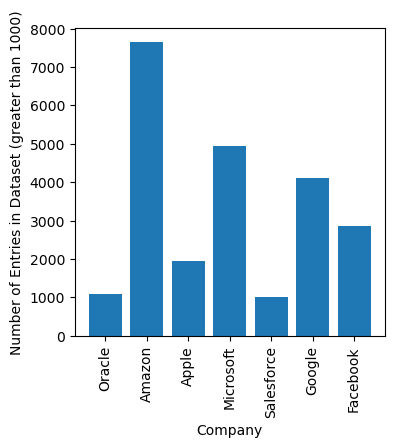

In [16]:
salary_vals = defaultdict(int)

for d in salaryAllData:
    company = d['company']
    salary_vals[company] += 1

x_small = []
y_small = []

x_large = []
y_large = []

for key, val in salary_vals.items():
    if val > 100 and val <1000:
        x_small.append(key)
        y_small.append(val)
    if val > 1000:
        x_large.append(key)
        y_large.append(val)



plt.figure(figsize=(11,4))
plt.bar(x_small, y_small)
plt.xticks(rotation='vertical')
plt.xlabel('Company')
plt.ylabel('Number of Entries in Dataset (between 100 and 1000)')
plt.show()

plt.figure(figsize=(4,4))
plt.bar(x_large, y_large)
plt.xticks(rotation='vertical')
plt.xlabel('Company')
plt.ylabel('Number of Entries in Dataset (greater than 1000)')
plt.show()

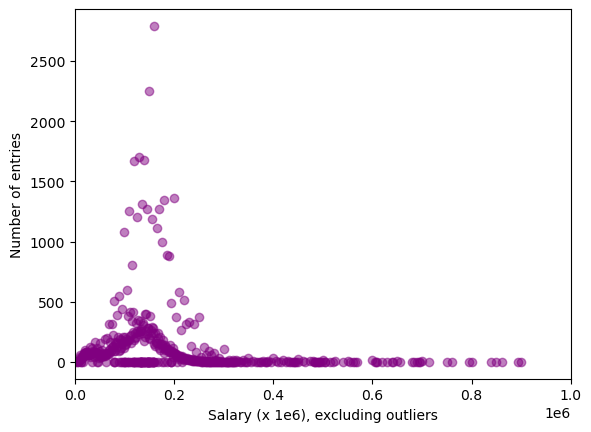

In [166]:
# Salary Values
salaries = defaultdict(int)

for d in salaryAllData:
    s = d['salary']
    salaries[s] += 1

x = salaries.keys()
y = salaries.values()   

plt.scatter(x, y, alpha=0.5, color='purple')
plt.xlim(0, 1e6)
plt.ylabel("Number of entries")
plt.xlabel("Salary (x 1e6), excluding outliers")
plt.show()

In [ ]:
# Salary vs Timestamp
x = []
y = []


for d in salaryAllData:
    x.append(d['timestamp'])
    y.append(d['salary'])

x.sort()


plt.figure(figsize=(11,4))
plt.plot(x[::1000], y[::1000])
plt.show()

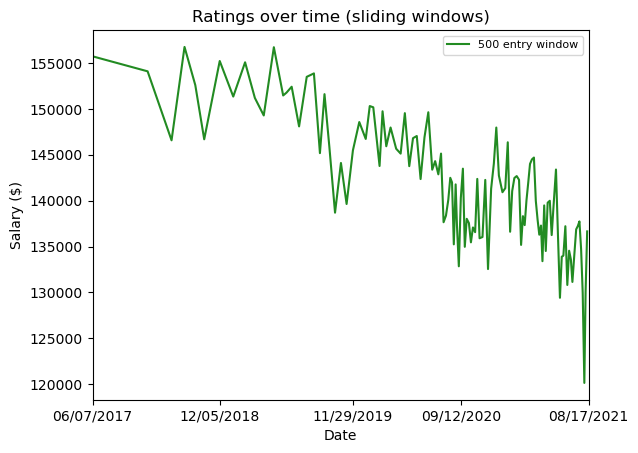

In [162]:
# Salary vs Timestamp (code from https://cseweb.ucsd.edu/~jmcauley/pml/code/chap7.html)

salariesTime = []
x = []
for d in salaryAllData:
    salariesTime.append((d['timestamp'], d['salary']))

salariesTime.sort()

for timestamp, _ in salariesTime:
    d = datetime.datetime.fromtimestamp(timestamp)
    x.append(d)

wSize = 500
y = [s[1] for s in salariesTime] # ratings
xu = [s[0] for s in salariesTime] # as unix times

xSum = sum(xu[:wSize])
ySum = sum(y[:wSize])
sliding = []

for i in range(wSize,len(x)-1):
    xSum += xu[i] - xu[i-wSize]
    ySum += y[i] - y[i-wSize]
    sliding.append((xSum*1.0/wSize,ySum*1.0/wSize))

X = [a[0] for a in sliding]
Y = [a[1] for a in sliding]

plt.plot(X[::wSize],Y[::wSize], label="500 entry window", color='forestgreen')

ticks = [X[0], X[3000], X[12000], X[28000], X[-1]]
ticks_formatted = [x[0].strftime("%m/%d/%Y"), x[3000].strftime("%m/%d/%Y"), x[12000].strftime("%m/%d/%Y"), \
        x[28000].strftime("%m/%d/%Y"), x[-1].strftime("%m/%d/%Y")]


plt.xlim(X[0], X[-1])
plt.ylabel("Salary ($)")
plt.xlabel("Date")
plt.xticks(ticks, ticks_formatted)
plt.legend(loc="best",fontsize=8)
plt.title("Ratings over time (sliding windows)")
plt.show()

In [13]:
# Location Values

In [14]:
# Salary vs Location

In [16]:
# Experience/Tenure Values

In [17]:
# Degree Values

In [35]:
# Race Values
blank = 0
asian = 0
black = 0
hispanic = 0
two_or_more = 0
white = 0

for d in salaryAllData:
    race = d['race']
    if race == -1:
        blank += 1
    elif race == 0:
        asian += 1
    elif race == 1:
        black += 1
    elif race == 2:
        hispanic += 1
    elif race == 3:
        two_or_more += 1
    elif race == 4:
        white += 1

print("Blank " , blank)
print("Asian " , asian)
print("Black " , black)
print("Hispanic " , hispanic)
print("Two Or More " , two_or_more)
print("White " , white)
print("Total", blank+asian+black+hispanic+two_or_more+white)

Blank  37721
Asian  11700
Black  684
Hispanic  1118
Two Or More  798
White  7975
Total 59996


In [14]:
# Gender Values
male = 0
female = 0
other = 0
blank = 0

for d in salaryAllData:
    gender = d['gender']
    if gender == -1:
        blank += 1
    elif gender == 0:
        female += 1
    elif gender == 1:
        male += 1
    elif gender == 2:
        other += 1

print("Blank " , blank)
print("Female " , female)
print("Male " , male)
print("Other " , other)
print("Total", blank+female+male+other)

Blank  18199
Female  6790
Male  34637
Other  370
Total 59996


In [ ]:
#####
# PART 2
#####

In [64]:
# split into training/test/validation
# baseline models
# mse/other metric?
# pre-process data to convert company name to encoding